In [49]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import errors, cluster_tools
import matplotlib.pyplot as pypl
pypl.style.use('_mpl-gallery')
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit

In [50]:
ind=[]   # list to store indicators
mng=[]   # list to store indicator names

cc = ['IRL', 'ISR', 'ITA', 'GBR', 'JPN']     # country codes
ind1=["EN.ATM.CO2E.KT"]   # World bank indicator for CO2 Emission
ind1mn=['C02 Emission']   # CO2 Emission Inducator name
ind2=["EG.ELC.COAL.ZS"]   # World bank indicator for Electricity production from coal source
ind2mn=['Electricity production from coal source']    # Electricity production from coal source Inducator name

data1 = wb.data.DataFrame(ind1, cc, mrv=60).T    # read data and transpose to get the dataframe by country economy
data1=data1.fillna(data1.mean())    # cleaning missing values by mean
data1.to_csv("C02 Emission.csv")
data1.head()

economy,GBR,IRL,ISR,ITA,JPN
YR1990,561774.2,30961.5,33805.9,405262.0,1090534.0
YR1991,570681.3,31466.7,34523.6,404074.1,1103984.0
YR1992,557885.3,31505.4,36857.3,402274.3,1115059.0
YR1993,541376.1,31653.6,40504.6,396927.9,1107610.0
YR1994,535182.9,32818.7,43361.2,392285.5,1160780.0


In [51]:
data2  = wb.data.DataFrame(ind2, cc, mrv=60).T   # read data and transpose to get the dataframe by country economy
data2=data2.fillna(data2.mean())    # cleaning missing values by mean
data2.to_csv("Electricity production.csv")
data2.head()

economy,GBR,IRL,ISR,ITA,JPN
YR1960,81.085853,53.315650,44.813478,3.818539,32.207792
YR1961,80.207283,48.471260,44.813478,7.154108,28.538986
YR1962,80.014219,45.156538,44.813478,7.909044,33.048433
YR1963,79.913934,39.965636,44.813478,4.851744,33.443771
YR1964,78.641493,33.550103,44.813478,4.892465,29.324859


In [52]:
indic=[]
indic.extend(ind1mn)
indic.extend(ind2mn)
print(indic)   # create list for indicator names

['C02 Emission', 'Electricity production from coal source']


In [53]:
def ratechart(wbdt, inm, ccd):    # fucntion to visualize growth rate by year
    pypl.figure(figsize=(6,3))
    pypl.title("{} by Year".format(inm))   # chart title
    cls=["m","y","b","g","c"]   # seting colours
    for x in range(len(ccd)):
        pypl.plot(wbdt[ccd[x]],cls[x],label=ccd[x])    # line chart for countries (CO2 and Electricity production)
    pypl.xlabel("Year")
    pypl.xticks(rotation=90)
    pypl.ylabel("{}".format(inm))
    pypl.legend()
    pypl.show()

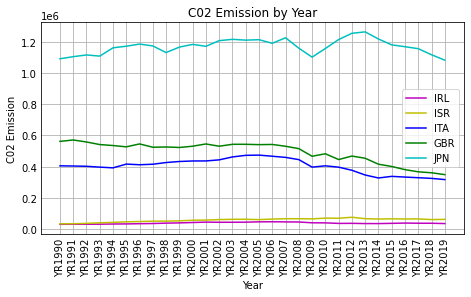

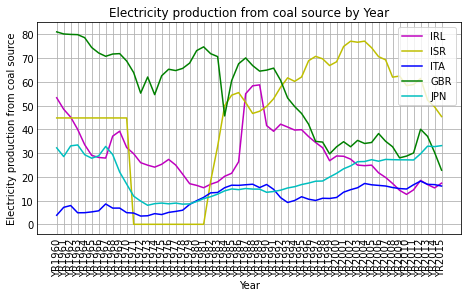

In [54]:
data_all=[data1,data2]
for d in range(len(data_all)):
    ratechart(data_all[d], indic[d], cc)

<Figure size 432x432 with 0 Axes>

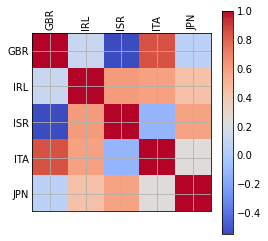

<Figure size 432x432 with 0 Axes>

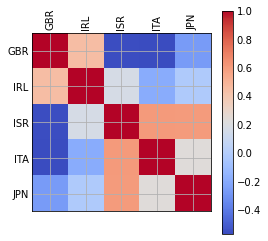

In [55]:
for da in range(len(data_all)):
    cluster_tools.map_corr(data_all[da])    # call fucntion for corelation heatmap

In [56]:
datascld=[]   # store all normalized data
vlmin=[]
vlmx=[]
for d in range(len(data_all)):
    scld=cluster_tools.scaler(data_all[d])   # call fucntion to scale or normalize data
    datascld.append(scld[0])    # take normalize data
    vlmin.append(scld[1])    # take min value
    vlmx.append(scld[2])    # take max value
print(datascld[0].head(),"\n")
print(datascld[1].head())

economy       GBR       IRL       ISR       ITA       JPN
YR1990   0.959834  0.000000  0.000000  0.562115  0.049458
YR1991   1.000000  0.030990  0.016984  0.554529  0.123684
YR1992   0.942298  0.033364  0.072210  0.543036  0.184804
YR1993   0.867851  0.042455  0.158522  0.508894  0.143695
YR1994   0.839924  0.113926  0.226122  0.479248  0.437123 

economy       GBR       IRL       ISR       ITA       JPN
YR1960   1.000000  0.881952  0.580667  0.023419  0.951395
YR1961   0.984925  0.776972  0.580667  0.249914  0.807118
YR1962   0.981612  0.705141  0.580667  0.301176  0.984453
YR1963   0.979891  0.592652  0.580667  0.093577  1.000000
YR1964   0.958058  0.453625  0.580667  0.096342  0.838023


In [57]:
datascld[0].head()

economy,GBR,IRL,ISR,ITA,JPN
YR1990,0.959834,0.000000,0.000000,0.562115,0.049458
YR1991,1.000000,0.030990,0.016984,0.554529,0.123684
YR1992,0.942298,0.033364,0.072210,0.543036,0.184804
YR1993,0.867851,0.042455,0.158522,0.508894,0.143695
YR1994,0.839924,0.113926,0.226122,0.479248,0.437123


In [58]:
datascld[1].head()

economy,GBR,IRL,ISR,ITA,JPN
YR1960,1.000000,0.881952,0.580667,0.023419,0.951395
YR1961,0.984925,0.776972,0.580667,0.249914,0.807118
YR1962,0.981612,0.705141,0.580667,0.301176,0.984453
YR1963,0.979891,0.592652,0.580667,0.093577,1.000000
YR1964,0.958058,0.453625,0.580667,0.096342,0.838023


In [59]:
sclbk=[]
for ds in range(len(datascld)):
    sclbk.append(cluster_tools.backscale(np.array(datascld[ds]),vlmin[ds],vlmx[ds]))   # call fucntion and store backscaled data
print(sclbk[0],"\n")
print(sclbk[1])

[[ 561774.2   30961.5   33805.9  405262.  1090534. ]
 [ 570681.3   31466.7   34523.6  404074.1 1103984. ]
 [ 557885.3   31505.4   36857.3  402274.3 1115059. ]
 [ 541376.1   31653.6   40504.6  396927.9 1107610. ]
 [ 535182.9   32818.7   43361.2  392285.5 1160780. ]
 [ 526807.8   33448.2   46775.3  416415.  1171012. ]
 [ 545477.8   34821.2   48734.1  412153.5 1184674. ]
 [ 524190.9   35972.5   50967.4  415517.3 1172630. ]
 [ 526000.3   38419.    51504.7  426372.2 1130307. ]
 [ 522752.3   39973.3   52983.6  433010.6 1165316. ]
 [ 530888.    42533.5   56997.3  436296.6 1182607. ]
 [ 545262.    44815.3   57952.5  436571.4 1170384. ]
 [ 530785.7   43929.8   61080.6  443473.1 1206595. ]
 [ 543036.9   44086.8   62925.5  462197.8 1214947. ]
 [ 543075.7   44687.6   63159.9  472404.8 1209849. ]
 [ 540916.8   46650.5   61012.4  473831.8 1212821. ]
 [ 542060.7   47263.3   64331.   466654.5 1189524. ]
 [ 530502.3   46355.8   66597.9  459371.1 1225069. ]
 [ 515335.5   45780.1   66708.   444984.5 1158

In [60]:
cluster_tools.get_diff_entries(datascld[0],datascld[1],'ISR')

total entries 84
entries in common 12


[0.01698404772666491,
 0.07221000868488998,
 0.15852172287391758,
 0.2261218771667853,
 0.30691501823353606,
 0.3532691392966422,
 0.406119179408055,
 0.41883414226654325,
 0.4538316456564901,
 0.5488140510633667,
 0.571418429478457,
 0.64544350916883,
 0.6891022379565188,
 0.6946492085391164,
 0.643829586840617,
 0.7223627633568638,
 0.7760079323572494,
 0.7786133993416523,
 0.7554150407148587,
 0.868829764324744,
 0.8523237405134735,
 0.7855826093952998,
 0.7315162114001605,
 0.7652192638904994,
 0.7377257893902355,
 0.7527172819844145,
 0.6453512174227884,
 0.6825897537230254,
 0.5806666379180604,
 0.5806666379180604,
 0.5806666379180604,
 0.5806666379180604,
 0.5806666379180604,
 0.5806666379180604,
 0.5806666379180604,
 0.5806666379180604,
 0.5806666379180604,
 0.5806666379180604,
 0.5806666379180604,
 0.23509707039444372,
 0.42586599423840144,
 0.647561286700201,
 0.7050503970627302,
 0.7191467969552864,
 0.6653528116790177,
 0.6052192792248283,
 0.617239779089138,
 0.64371632417

## Clustering

In [61]:
def optclus(dt, cl):   # function to choose optimum clucter value
    val_el = []
    for i in range(1, cl):   # apply k-means with clsuter number 1 to the given value
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=600,  random_state=32)   # create K-means model
        kmeans.fit(dt)    # fir k-means model
        val_el.append(kmeans.inertia_)   # store all inertia value
    valarr=np.array(val_el)
    valarr=valarr[valarr>1]    # get the value after hcih curve is smoothing
    op=valarr[-1]    # optimum clsuter value
    opid=val_el.index(op)
    pypl.figure(figsize=(4,2))
    pypl.title('Elbow Curve (Optimum Cluster: {})'.format(opid))
    pypl.plot(range(1, cl), val_el,"c--")
    pypl.plot(range(1, cl), val_el,"Xm")
    pypl.xlabel('Number of clusters')
    pypl.ylabel('Inertia')
    pypl.show()
    
    return opid

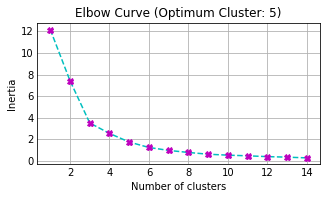

In [62]:
optv=optclus(datascld[0],15)

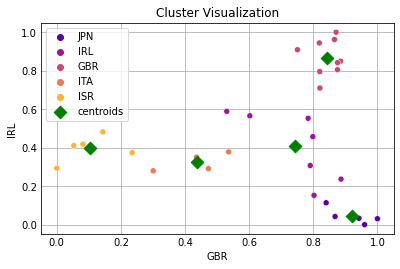

In [63]:
optkn = KMeans(n_clusters=optv, max_iter=500, n_init=20, random_state=32)   # apply K-Means with optimum cluster
clus_model1 = optkn.fit(datascld[0])   # fit model
nlst=[]
for i in clus_model1.labels_:
    if i==0:
        nlst.append(data1.columns[0])
    elif i==1:
        nlst.append(data1.columns[1])
    elif i==2:
        nlst.append(data1.columns[2])
    elif i==3:
        nlst.append(data1.columns[3])
    elif i==4:
        nlst.append(data1.columns[4])
df=pd.DataFrame(datascld[0],columns=data1.columns)
pypl.figure(figsize=(5,3))
pypl.title('Cluster Visualization')    # clsuter visualization
sns.scatterplot(data=df, x=data1.columns[0], y=data1.columns[1], hue=nlst,palette="plasma")
pypl.scatter(clus_model1.cluster_centers_[:,0], clus_model1.cluster_centers_[:,1], 
            marker="D", c="g", s=80, label="centroids")
pypl.legend(loc='upper left')
pypl.show()

## Curve Fitting

In [64]:
def func(x, a, b, c):     # create function for curve fitting
    return a * np.exp(-b * x) + c

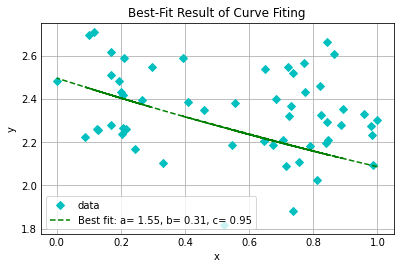

In [65]:
y = func(datascld[1].values[:,1], 1.8, 0.3, 0.7)    # call fucntion to curve fit
rng = np.random.default_rng()    # set range
try:
    y_noise = 0.15 * rng.normal(size=datascld[1].values[:,1].size)  # detect data noise
    ydata = y + y_noise    # predit data
    f1, f2 = curve_fit(func, datascld[1].values[:,1], ydata)   # apply curve fitting
except:
    y_noise = round(np.random.random(),2) * rng.normal(size=datascld[1].values[:,1].size)
    ydata = y + y_noise
    f1, f2 = curve_fit(func, datascld[1].values[:,1], ydata)
pypl.figure(figsize=(5,3))
pypl.title('Best-Fit Result of Curve Fiting')
pypl.plot(datascld[1].values[:,0], ydata, 'cD', label='data')
pypl.plot(datascld[1].values[:,0], func(datascld[1].values[:,0], *f1), 'g--',label='Best fit: a=%5.2f, b=%5.2f, c=%5.2f' % tuple(f1))
pypl.xlabel('x')
pypl.ylabel('y')
pypl.legend()
pypl.show()